# 1 Logistic Regression
In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classication model that estimates an applicant's
probability of admission based the scores from those two exams. 

## 1.1 Visualization
We will start by visualizing the data. The positive and negative examples are shown in different colors/markers.

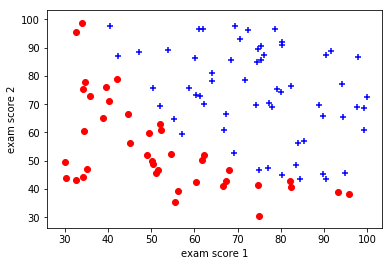

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data = np.loadtxt('ex2data1_Lab_4.txt', delimiter=',')

m = len(data[:,0])
n = len(data[0,:])
X = np.ones(shape=(m,n))
X[:,1:3] = data[:,0:2]
y = data[:,2]

plt.scatter(X[np.where(y==1),1], X[np.where(y==1),2], marker = '+', c = 'b')
plt.scatter(X[np.where(y==0),1], X[np.where(y==0),2], marker = 'o', c = 'r')
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.show()

## 1.2 Implementation
### 1.2.1 Implement sigmoid function
Before you start with the actual cost function, recall that the logistic regres-
sion hypothesis is defined as:
\begin{equation}
h(x) = g(\theta^T x)
\end{equation}
where function $g$ is the sigmoid function. The sigmoid function is defined as
\begin{equation}
g(z) = \frac{1}{1+e^{-z}}
\end{equation}
Your first step is to implement this function below so it can be
called by the rest of your program.

In [84]:
##TODO Implement the sigmoid function
def sigmoid(z):
    return 1 / ( 1+ np.exp(-z) )

Visualize the implemented sigmoid function

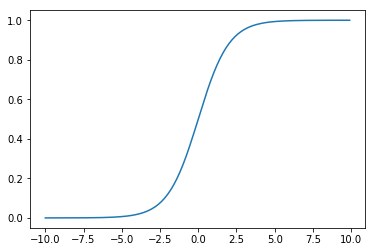

In [85]:
plt.plot(np.arange(-10,10,.1) ,sigmoid(np.arange(-10,10,.1)))
plt.show()

### 1.2.2 Implement Cost function and Gradient
Now you will implement the cost function and gradient for logistic regression. Complete the code in compute_cost and compute_gradient to return the cost and gradient.

Recall that the cost function in logistic regression is
\begin{equation}
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)})) \large]
\end{equation}
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0,1,\cdots,n$) is defined as follows:
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation}

In [86]:
def compute_cost(theta, X, y):
    h = sigmoid(X.dot(theta)).flatten()
    c = y*np.log(h) + (1-y)*np.log(1-h)
    return -c.sum()/len(y)

def compute_gradient(theta, X, y):
    #TODO implement the compute_gradient 
    m = len(y)
    h = sigmoid(X.dot(theta)).flatten()
    x0 = (h - y).dot(X[:,0]).sum()
    x1 = (h - y).dot(X[:,1]).sum()
    x2 =(h - y).dot(X[:,2]).sum()
    x0 = (1/m)*x0.sum()
    x1 = (1/m)*x1.sum()
    x2 = (1/m)*x2.sum()
    return np.array([x0,x1,x2])

### 1.2.3 Minimizing cost function
In the previous lab, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function
and calculated its gradient, then took a gradient descent step accordingly.

In this lab, we will use a scipy built-in function called [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).  It will find the best parameters theta for the logistic regression cost function given a fixed dataset (of X and Y values).

The parameters of the function are:
* function that computes cost
* initial theta
* arguments tuple
* gradient of the cost function

Once, minimize has finished finding the optimal $\theta$, you should see that the cost is about 0.203.

In [87]:
theta = np.array([0.,0.,0.])
res = minimize(fun=compute_cost, x0=theta, args=(X,y), jac=compute_gradient, method='BFGS')
compute_cost(res.x, X, y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


0.20349770158944375

### 1.2.4 Plotting Decision boundary

In [88]:
def plotDecisionBoundary(theta, X, y):
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:,1])-2,  np.max(X[:,1])+2])
    
    # Calculate the decision boundary line
    plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])
    
    plt.scatter(X[np.where(y==1),1], X[np.where(y==1),2], marker = '+', c = 'b')
    plt.scatter(X[np.where(y==0),1], X[np.where(y==0),2], marker = 'o', c = 'r')
    plt.plot(plot_x, plot_y, c='y')
    plt.show()

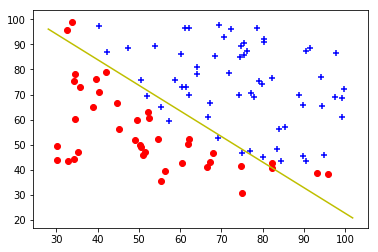

In [89]:
plotDecisionBoundary(res.x, X, y)

### 1.2.5 Evaluating Logistic Regression
After learning the parameters, you can use the model to predict whether a
particular student will be admitted. For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

In [90]:
def predict(theta, x):
    h = sigmoid(x.dot(theta)).flatten()
    print(h)

In [91]:
predict(res.x, np.array([1,45,85]))

[0.77629072]


# 2 Regularized Logistic Regression
In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

## 2.1 Visualizing the data
Start by visualizing the data. The figure below will shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.

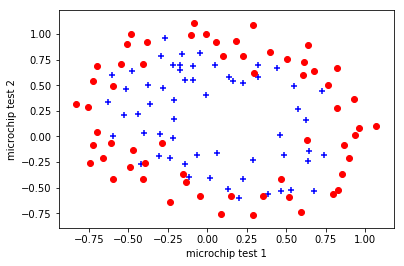

In [92]:
data = np.loadtxt('ex2data2_Lab_4.txt', delimiter=',')
m = len(data[:,0])
n = len(data[0,:])
X = np.ones(shape=(m,n))
X[:,1:3] = data[:,0:2]
y = data[:,2]

plt.scatter(X[np.where(y==1),1], X[np.where(y==1),2], marker = '+', c = 'b')
plt.scatter(X[np.where(y==0),1], X[np.where(y==0),2], marker = 'o', c = 'r')
plt.xlabel('microchip test 1')
plt.ylabel('microchip test 2')
plt.show()

## 2.2 Feature mapping
One way to to the data better is to create more features from each data
point. In the provided function mapFeature, we will map the features into
all polynomial terms of $x_1$ and $x_2$ up to the sixth power. The mapFeature(x) should return the following vector.
\begin{bmatrix}
1 \\x_1  \\x_2  \\ x_1^2 \\ x_1 x_2 \\ x_2^2 \\ x_1^3 \\ \vdots \\x_1 x_2^5 \\x_2^6
\end{bmatrix}

As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting. In the next parts of the exercise, you
will implement regularized logistic regression to fit the data and also see for
yourself how regularization can help combat the overfitting problem.

In [93]:
def mapFeature(x1,x2):
    degree = 6
    m = len(x1)
    XX = np.ones(shape=(m,1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            XX = np.append(XX,r[:,np.newaxis], axis=1)
            
    return XX

## 2.3 Regularized Cost function and Gradient
Now you will implement code to compute the cost function and gradient for
regularized logistic regression. 

Recall that the regularized cost function in logistic regression is
\begin{equation}
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
\end{equation}

The gradient for $j=0$ will remain unchanged but for $j \ge 1$ it is:
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j}=\large[ \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}\large] + \frac{\lambda}{m}\theta_j  \,\,\, for \, j\ge1
\end{equation}

In [94]:
def compute_cost_reg(theta, X, y, l):
    # TODO implmenent the compute_cost_reg function    
    h = sigmoid(X.dot(theta)).flatten()
    c = y*np.log(h) + (1-y)*np.log(1-h)
    j = -c.sum()/len(y)
    return j + (l/(2*len(y)))*np.sum(theta**2)

    

def compute_gradient_reg(theta, X, y, l):
    h = sigmoid(X.dot(theta)).flatten()
    g = np.zeros(len(theta))
    
    g[0] = np.sum((h-y))/len(y)
    for i in np.arange(1,X.shape[1]):
        g[i] = np.sum((h-y)*X[:,i])/len(y) + l*theta[i]/len(y)
    return g

## 2.4 Minimizing Cost Function
As before we are going to use scipy minimize to minize the regularized cost function

In [95]:
XX = mapFeature(X[:,1],X[:,2])
theta = np.zeros(shape=(1,XX.shape[1]))
l = 2 # lambda
res = minimize(fun=compute_cost_reg, x0=theta, args=(XX,y,l), jac=compute_gradient_reg, method='BFGS')
compute_cost_reg(res.x, XX, y,l)

0.5801555614632643

## 2.5 Plotting the decision boundary
To help you visualize the model learned by this classifier, we have pro-
vided the function plotDecisionBoundary_nonlinear which plots the (non-linear)
decision boundary that separates the positive and negative examples. In
plotDecisionBoundary_nonlinear, we plot the non-linear decision boundary by com-
puting the classifier's predictions on an evenly spaced grid and then and drew
a contour plot of where the predictions change from y = 0 to y = 1.


In [96]:
def plotDecisionBoundary(theta, X, y, l):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = (mapFeature(np.array([u[i]]), np.array([v[j]])).flatten().dot(theta.flatten()))

    z = z.T
    plt.contour(u, v, z, 0)
    plt.scatter(X[np.where(y==1),1], X[np.where(y==1),2], marker = '+', c = 'b')
    plt.scatter(X[np.where(y==0),1], X[np.where(y==0),2], marker = 'o', c = 'r')
    plt.xlabel('microchip test 1')
    plt.ylabel('microchip test 2')
    plt.title('lambda = %f' % l)
    plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
    plt.show()

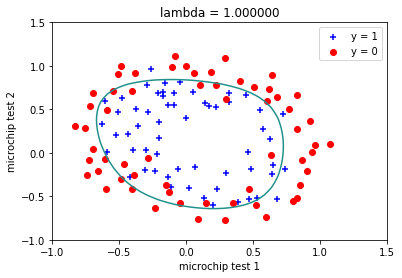

In [97]:
plotDecisionBoundary(res.x, X, y, 1)

## 2.6 Effect of Regularization
As you vary $\lambda$ from 0 to 2, see the effect of regularization on the decision boundary.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


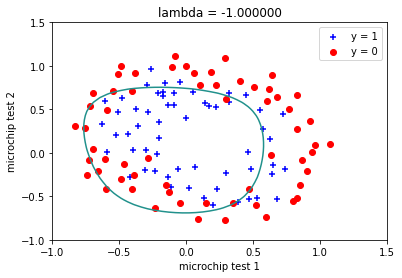

In [107]:
theta = np.zeros(shape=(1,XX.shape[1]))
l = -1 # lambda
res = minimize(fun=compute_cost_reg, x0=theta, args=(XX,y,l), jac=compute_gradient_reg, method='BFGS')
plotDecisionBoundary(res.x, X, y, l)

### Question
What is the effect on the decision boundary as you vary the $\lambda$ parameter?

### Answer
As lambda value is increased the decsion boundary gets widen and get more inaccurate, they are underfit. 0.1 is giving the best fit. Negative values are also giving inaccurate results, they are overfit.